# Lab 5 - Data Visualization

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [3]:
week_3 = pd.read_csv("nfloffenseweek3.csv")
week_4 = pd.read_csv("nfloffenseweek4.csv")
week_5 = pd.read_csv("nfloffenseweek5.csv")


In [4]:
week_3.insert(loc=0, column="week", value = 3)
week_4.insert(loc=0, column="week", value = 4)
week_5.insert(loc=0, column="week", value = 5)

In [5]:
# week_3_4 = week_3.merge(week_4)
# week_3_4
weeks = pd.concat([week_3, week_4, week_5], axis=0, ignore_index=True)
weeks.head()

,week,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,3,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,56,88,735,10,2,7.8,32,72,406,2,5.6,18,8,44,5,42.9,8.6,35.63
1,3,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,66,112,716,7,2,6.2,38,87,511,5,5.9,20,15,129,5,40.5,5.4,31.05
2,3,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,94,134,987,9,2,7.0,49,72,337,1,4.7,22,20,136,6,46.7,16.7,47.46
3,3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,74,110,843,8,1,7.5,45,68,279,2,4.1,15,15,124,8,45.2,6.5,40.73
4,3,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,66,98,890,4,1,8.5,41,103,451,6,4.4,26,23,173,6,39.4,3.0,45.06


In [6]:
nfl = pd.read_csv("nfl_teams.csv")
nfl.head()

,ID,team,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South


In [7]:
nfl.drop("ID", axis=1, inplace=True)
nfl.head()

,team,Abbreviation,Conference,Division
0,Arizona Cardinals,ARI,NFC,West
1,Atlanta Falcons,ATL,NFC,South
2,Baltimore Ravens,BAL,AFC,North
3,Buffalo Bills,BUF,AFC,East
4,Carolina Panthers,CAR,NFC,South


In [8]:
df = weeks.merge(nfl, left_on="team", right_on="team", how="left")
df.head()

,week,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Abbreviation,Conference,Division
0,3,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,56,88,735,10,2,7.8,32,72,406,2,5.6,18,8,44,5,42.9,8.6,35.63,BAL,AFC,North
1,3,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,66,112,716,7,2,6.2,38,87,511,5,5.9,20,15,129,5,40.5,5.4,31.05,DET,NFC,North
2,3,3,Buffalo Bills,3,91,1324,213,6.2,5,3,77,94,134,987,9,2,7.0,49,72,337,1,4.7,22,20,136,6,46.7,16.7,47.46,BUF,AFC,East
3,3,4,Kansas City Chiefs,3,88,1122,180,6.2,3,2,68,74,110,843,8,1,7.5,45,68,279,2,4.1,15,15,124,8,45.2,6.5,40.73,KC,AFC,West
4,3,5,Philadelphia Eagles,3,86,1341,208,6.4,1,0,73,66,98,890,4,1,8.5,41,103,451,6,4.4,26,23,173,6,39.4,3.0,45.06,PHI,NFC,East


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

In [9]:
team_colors = pd.read_csv("teams_colors_logos.csv")
team_colors.head()

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


In [23]:
team_colors.team_name.duplicated()
team_colors.team_name.drop_duplicates(inplace=True);

In [24]:
df1 = df.merge(team_colors, left_on="team", right_on="team_name");
df1.head()

,week,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Abbreviation,Conference,Division,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,3,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,56,88,735,10,2,7.8,32,72,406,2,5.6,18,8,44,5,42.9,8.6,35.63,BAL,AFC,North,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,4,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,76,117,869,11,4,7.0,39,105,568,3,5.4,31,17,114,7,42.2,11.1,32.97,BAL,AFC,North,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,5,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,95,149,1039,12,5,6.6,46,133,723,3,5.4,44,23,162,9,43.6,10.9,36.86,BAL,AFC,North,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,3,2,Detroit Lions,3,95,1227,203,6.0,2,0,63,66,112,716,7,2,6.2,38,87,511,5,5.9,20,15,129,5,40.5,5.4,31.05,DET,NFC,North,DET,Detroit Lions,1540,Lions,NFC,NFC North,#0076B6,#B0B7BC,#000000,#004e89,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/det.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,4,1,Detroit Lions,4,140,1747,269,6.5,4,1,90,93,152,1091,11,3,6.9,57,112,656,7,5.9,26,23,188,7,45.8,8.3,53.17,DET,NFC,North,DET,Detroit Lions,1540,Lions,NFC,NFC North,#0076B6,#B0B7BC,#000000,#004e89,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/det.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


<BarContainer object of 90 artists>

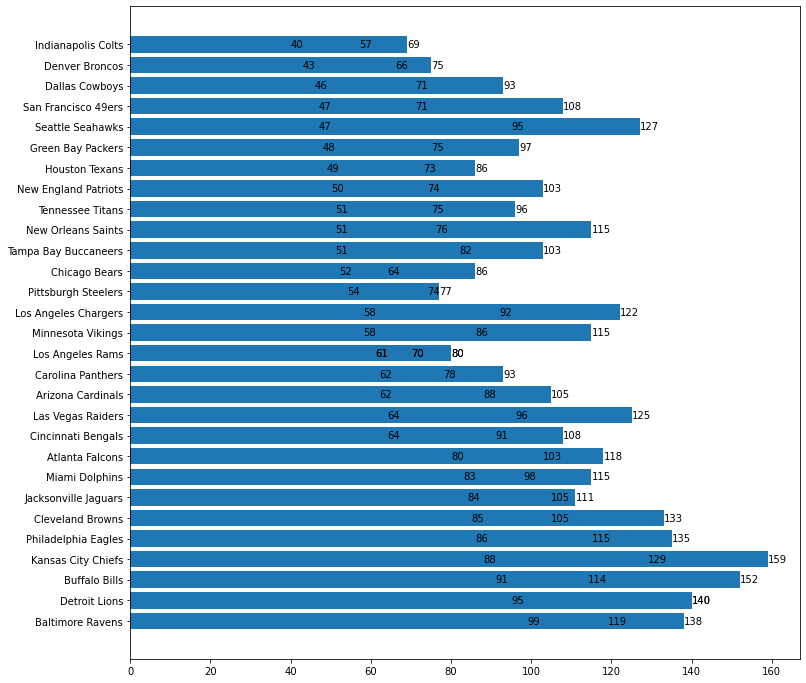

In [89]:
plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df1.team, df1.points_scored )
plt.bar_label(barhplot, labels = df1.points_scored)
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 2160x576 with 0 Axes>

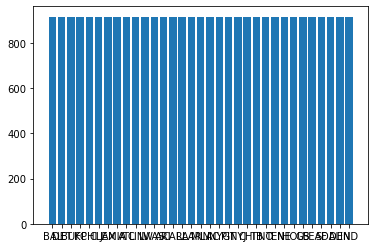

In [38]:
plt.figure(figsize=(30, 8))

plt.bar(df1.team_abbr, df1.passing_yards.mean() )
plt.bar(df1.team_abbr, bottom=df1.rushing_yards.mean())


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

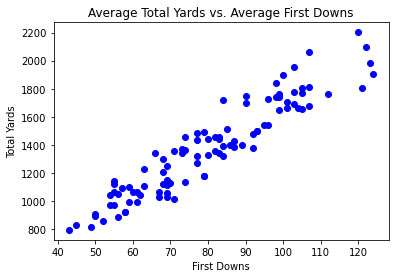

In [42]:
x = df1['1st_downs']
y = df1.total_yards

plt.scatter(x, y, c = "blue")
plt.xlabel("First Downs")
plt.ylabel("Total Yards")
plt.title("Average Total Yards vs. Average First Downs")
plt.show()

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0.5, 1.0, 'Penalty Yards per Week (Ravens vs. Rams)')

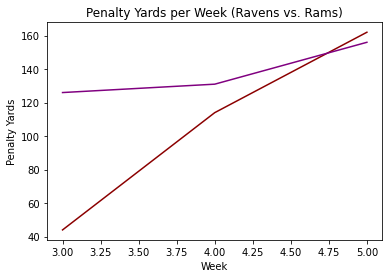

In [56]:
ravens = df1[ df1.team == "Baltimore Ravens"]
rams = df1[ df1.team == "Los Angeles Rams"]

plt.plot(ravens.week, ravens.penalty_yards, c='darkred')
plt.plot(rams.week, rams.penalty_yards, 'purple')
plt.xlabel("Week")
plt.ylabel("Penalty Yards")
plt.title('Penalty Yards per Week (Ravens vs. Rams)')

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

In [44]:
tot = df1[df1.team].points_scored.mean()
yards = df1[df1.team].yards_per_play.mean()

x = np.array(yards)
y = np.array(tot)

plt.scatter(x, y)
plt.show()

KeyError: "None of [Index(['Baltimore Ravens', 'Baltimore Ravens', 'Baltimore Ravens',\n       'Detroit Lions', 'Detroit Lions', 'Detroit Lions', 'Buffalo Bills',\n       'Buffalo Bills', 'Buffalo Bills', 'Kansas City Chiefs',\n       'Kansas City Chiefs', 'Kansas City Chiefs', 'Philadelphia Eagles',\n       'Philadelphia Eagles', 'Philadelphia Eagles', 'Cleveland Browns',\n       'Cleveland Browns', 'Cleveland Browns', 'Jacksonville Jaguars',\n       'Jacksonville Jaguars', 'Jacksonville Jaguars', 'Miami Dolphins',\n       'Miami Dolphins', 'Miami Dolphins', 'Atlanta Falcons',\n       'Atlanta Falcons', 'Atlanta Falcons', 'Cincinnati Bengals',\n       'Cincinnati Bengals', 'Cincinnati Bengals', 'Las Vegas Raiders',\n       'Las Vegas Raiders', 'Las Vegas Raiders', 'Washington Commanders',\n       'Washington Commanders', 'Washington Commanders', 'Arizona Cardinals',\n       'Arizona Cardinals', 'Arizona Cardinals', 'Carolina Panthers',\n       'Carolina Panthers', 'Carolina Panthers', 'Los Angeles Rams',\n       'Los Angeles Rams', 'Los Angeles Rams', 'Los Angeles Rams',\n       'Los Angeles Rams', 'Los Angeles Rams', 'Minnesota Vikings',\n       'Minnesota Vikings', 'Minnesota Vikings', 'Los Angeles Chargers',\n       'Los Angeles Chargers', 'Los Angeles Chargers', 'New York Giants',\n       'New York Giants', 'New York Giants', 'Pittsburgh Steelers',\n       'Pittsburgh Steelers', 'Pittsburgh Steelers', 'New York Jets',\n       'New York Jets', 'New York Jets', 'Chicago Bears', 'Chicago Bears',\n       'Chicago Bears', 'Tampa Bay Buccaneers', 'Tampa Bay Buccaneers',\n       'Tampa Bay Buccaneers', 'New Orleans Saints', 'New Orleans Saints',\n       'New Orleans Saints', 'Tennessee Titans', 'Tennessee Titans',\n       'Tennessee Titans', 'New England Patriots', 'New England Patriots',\n       'New England Patriots', 'Houston Texans', 'Houston Texans',\n       'Houston Texans', 'Green Bay Packers', 'Green Bay Packers',\n       'Green Bay Packers', 'Seattle Seahawks', 'Seattle Seahawks',\n       'Seattle Seahawks', 'San Francisco 49ers', 'San Francisco 49ers',\n       'San Francisco 49ers', 'Dallas Cowboys', 'Dallas Cowboys',\n       'Dallas Cowboys', 'Denver Broncos', 'Denver Broncos', 'Denver Broncos',\n       'Indianapolis Colts', 'Indianapolis Colts', 'Indianapolis Colts'],\n      dtype='object')] are in the [columns]"

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)